In [2]:
#import SAIRD_Feedback as SAIRD_fm
import SIRD_Model
import SIRD_Feedback as SIRD_fm
#import SAIRD_Model
import SIRD_Feedback_Delay as SIRD_fm_Delay

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [3]:
SIRD_fm_Delay.weightDecay = .9

In [7]:
#pathc = "../Data/Italian Data/"
pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
filename = "AZ.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)
recovRaw = SIRD_Model.approxRecovered(infectRaw, deadRaw)
infectRaw = infectRaw - deadRaw - recovRaw

#asymptRaw = SAIRD_fm.calcAsymptomatic(infectRaw, recovRaw, deadRaw, 5)

#set up day range
pop = 7300000 #60000000 #for italy
skipDays = 0
numDays = len(infectRaw) #just to get initial beginning data
daysToPredict = 170
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

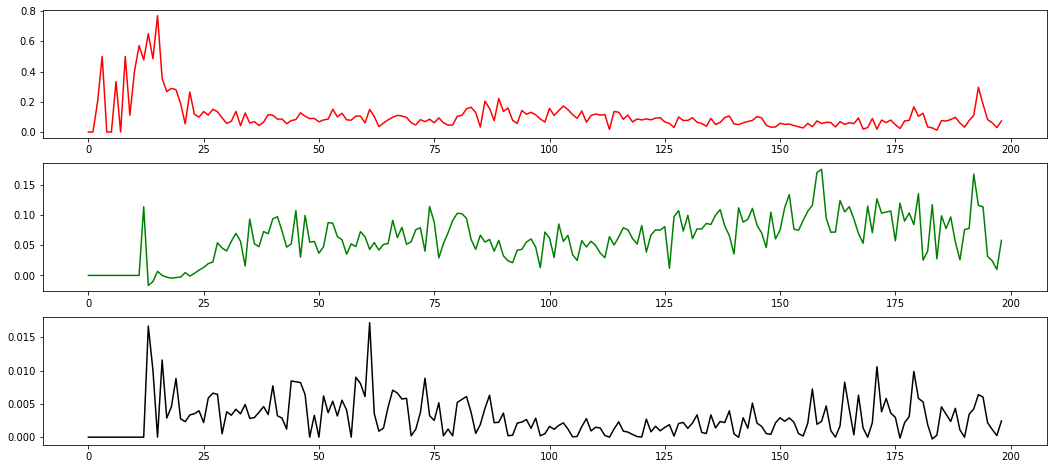

In [18]:
q=.2
#SAIRD_Model.graphData(asympt, infect, recov, dead,graphVals=[1,1,0,0])
timeVars = SIRD_Model.solveTimeVars(q,pop, infect, recov, dead, graph=True)
betaTime = timeVars[0]
#linVars = SAIRD_Model.getLinVars(asympt,infect,recov,dead, q, pop)
#print(linVars)

[0.07865111004787305, 3.5811917963858133e-31, 0.07327079576169931, 0.001606152499661008]


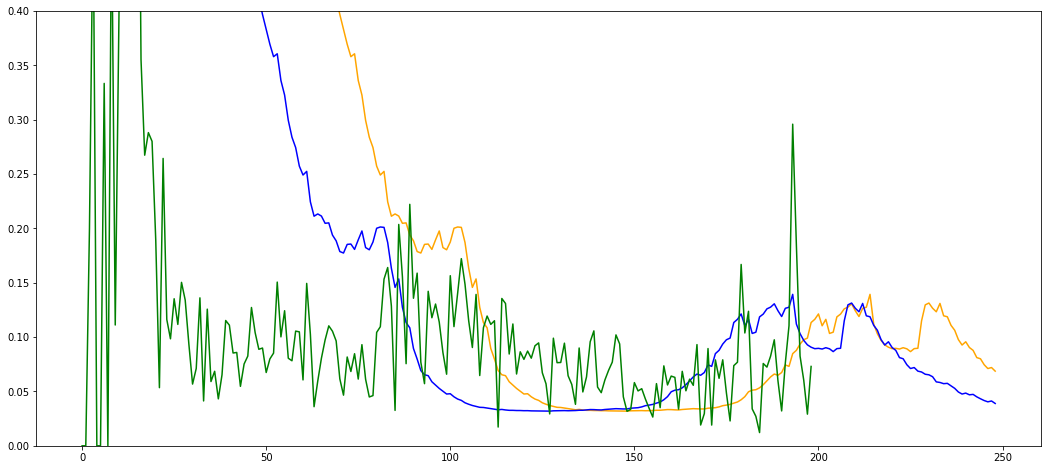

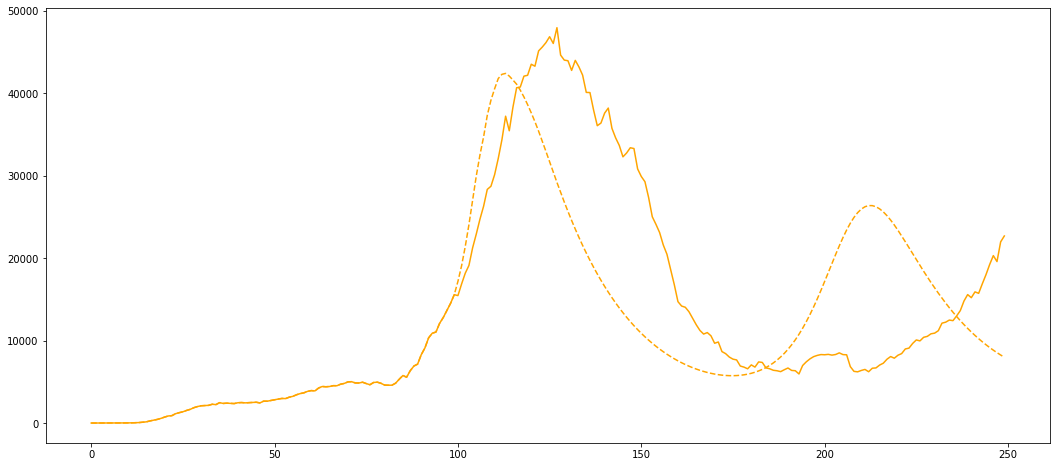

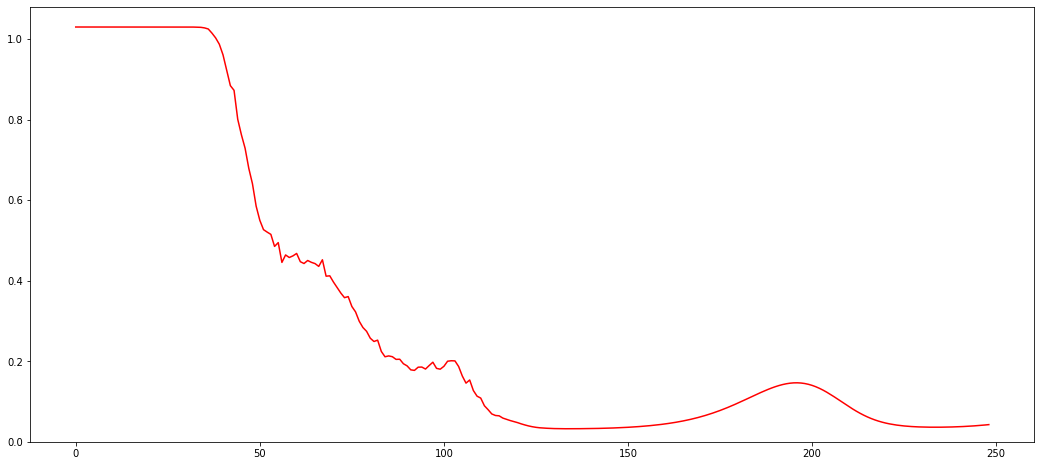

In [58]:
#set up day range
pop = 7300000 #60000000 #for italy
skipDays = 0
numDays = 250 #just to get initial beginning data
daysToPredict = 150
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

q = .2
b2 = 700 #1000
b3 = 2 #1

nonLinVars = [q,b2,b3]
feedLinVars = SIRD_fm.getLinVars(infect, recov, dead, q, pop, nonLinVars[1:])

print(feedLinVars)

feedLinVars[0] = .03
feedLinVars[1] = 1

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(SIRD_fm_Delay.calculateBeta(nonLinVars[1:], feedLinVars, q,pop, infect), color="orange")
ax.plot(SIRD_fm.calculateBeta(nonLinVars[1:], feedLinVars, q,pop, infect), color="blue")
ax.plot(betaTime, color="green")
ax.set_ylim([0,.4])

#SIRD_fm.predictMatch(nonLinVars, feedLinVars, infect, recov, dead, pop, daysToPredict, graphVals=[0,1,0,0])
SIRD_fm_Delay.predictMatch(nonLinVars, feedLinVars, infect, recov, dead, pop, daysToPredict, graphVals=[0,1,0,0])

[0.057646362555374586, 0.031968153652521876, 0.000983367504777999]


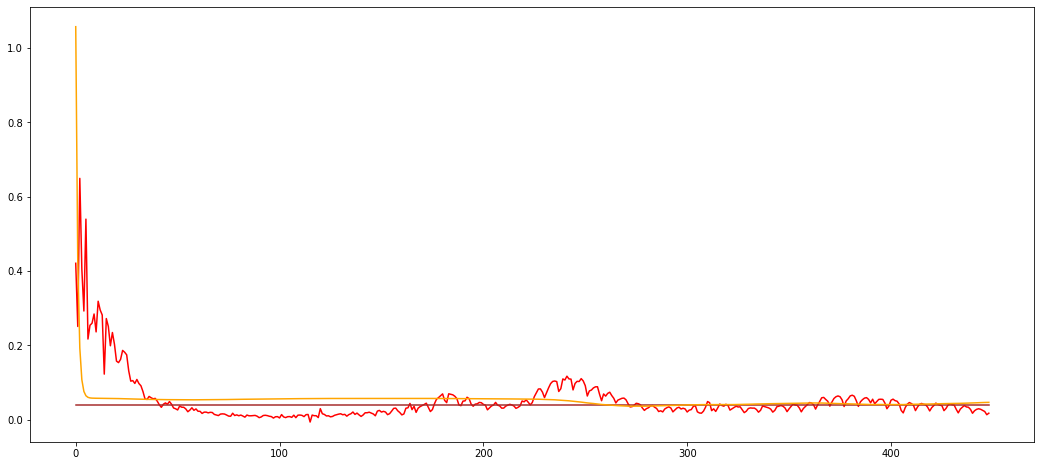

In [3]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = len(infectRaw) #max days
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

#set up constraints
#boundQ =     (.09,  .09) #q should be between 0 and 1
#boundAlpha = (0,   1.00)
#boundC =     (0,      0)
#boundB1 =    (0,     10)
#boundB2 =    (1,      4)

lamda = 10 #regularization weight
wVal = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

#q = .09
#alpha = .1
#C = 0
#b1 = 10
#b2 = 2

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect, recov, dead, lamda, w)

print(linVars)


betaConst = SIRD_Model.calculateConstantParams(infect, recov, dead, pop, q)[0]
betaConstGraph = np.ones((len(infect)-1))*betaConst #fill array with const value

fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.plot(SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q, graph=False)[:,0], color="red") #time varying beta
ax2.plot(betaConstGraph, color="brown") #constant beta
ax2.plot(fm.calculateBeta(nonLinVars, linVars, pop, infect), color="orange") #feedback beta